### Implementing K-means

In [16]:
import numpy as np
import pylab as plt
from scipy.spatial.distance import cdist 
%matplotlib inline

Geneate some data with three clear clusters

In [2]:
cluster_means = [[0,0],[4,4],[-4,4]]
n_data = 20 # Number in each cluster
x = np.empty(shape=(0,2))
for i,m in enumerate(cluster_means):
    x = np.vstack((x,np.random.randn(n_data,2) + np.tile(m,(n_data,1))))

Plot the data

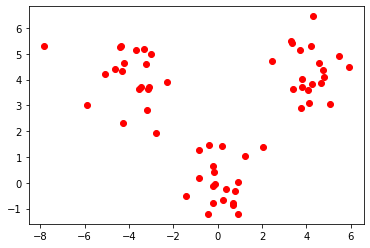

In [4]:
plt.figure()
plt.plot(x[:,0],x[:,1],'ro')

Initialise the things needed for k-means

In [243]:
# set K
K = 3
# Initialise the means
mu = np.random.randn(K,2)
# Set maximum number of iterations
max_its = 20
N = len(x)
z = np.zeros((N,K))
oldz = np.ones((N,K)) # just to make sure it is different from z in iteration 1


#TODO: initialise some colours, so it's easier to see what the iterations are doing 

Run the algorithm - plotting the state at each iteration

In [73]:
def kmeans(x, k, n_iterations):
    mu = np.random.randn(k, 2) #step 1  generate centroids
    distances = cdist(x, mu,'euclidean') #Step 2 generate distances between each points to the mean
    points = np.array([np.argmin(i) for i in distances]) # get the least distances
    for _ in range(n_iterations):
        centroids = []
        for idx in range(k):
            c_means = x[points==idx].mean(axis=0) 
            centroids.append(c_means)

        centroids = np.vstack(centroids) #stack centroids vertically

        distances = cdist(x, mu,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
        
    return points

In [224]:
for i in range(100):
    n_points = []
    n_centroids = []
    label = kmeans(x, K, i)
    n_points.append(points)
    n_centroids.append(centroids)

C:\Users\user\AppData\Local\Temp\ipykernel_17508\34294800.py:8: RuntimeWarning: Mean of empty slice.
  c_means = x[points==idx].mean(axis=0)


In [244]:
centroids

array([[ 2.92891974,  2.78394393],
       [-2.6033639 ,  4.11007651],
       [ 0.17823791, -0.72563813]])

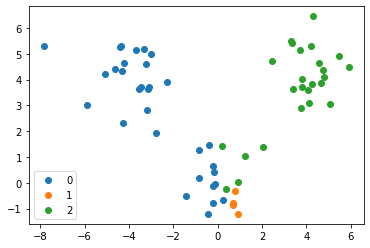

In [242]:
label = kmeans(x, K, 100)
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(x[label == i , 0] , x[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
(trainX - testX[0, :])**2).sum(axis=1)